# Generalized Linear Models Exercise

In this exercise, we will create a Poisson Regression on the `bikeshare` data provided.

_Note: This is based on the bikershare exercise from the textbook._

In [4]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore') # mute warning messages
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)
from ISLP.models import contrast

In [2]:
Bike = load_data('Bikeshare')
Bike.shape, Bike.columns

((8645, 15),
 Index(['season', 'mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
        'registered', 'bikers'],
       dtype='object'))

Fit the Linear Regression model to the data

In [5]:
# Your code here
X = MS(['mnth', 'hr', 'workingday', 'temp', 'weathersit']).fit_transform(Bike) 
Y = Bike['bikers']
M_lm = sm.OLS(Y, X).fit() 
summarize(M_lm)

,coef,std err,t,P>|t|
intercept,-27.2068,6.715,-4.052,0.000
mnth[Aug],11.8181,4.698,2.515,0.012
mnth[Dec],5.0328,4.280,1.176,0.240
mnth[Feb],-34.5797,4.575,-7.558,0.000
mnth[Jan],-41.4249,4.972,-8.331,0.000
mnth[July],3.8996,5.003,0.779,0.436
mnth[June],26.3938,4.642,5.686,0.000
mnth[March],-24.8735,4.277,-5.815,0.000
mnth[May],31.1322,4.150,7.501,0.000
mnth[Nov],18.8851,4.099,4.607,0.000


Let's see the fit for the Poisson Regression.

In [6]:
M_pois = sm.GLM(Y, X, family=sm.families.Poisson()).fit()

In [7]:
summarize(M_pois)

,coef,std err,z,P>|z|
intercept,3.3854,0.010,333.686,0.000
mnth[Aug],0.1296,0.005,26.303,0.000
mnth[Dec],-0.0048,0.005,-0.951,0.342
mnth[Feb],-0.4656,0.006,-76.909,0.000
mnth[Jan],-0.6917,0.007,-98.996,0.000
mnth[July],0.0821,0.005,15.545,0.000
mnth[June],0.2017,0.005,41.673,0.000
mnth[March],-0.3153,0.005,-58.225,0.000
mnth[May],0.2189,0.004,49.792,0.000
mnth[Nov],0.1287,0.005,27.880,0.000


Compare the fitted model of Linear and Poisson Regressions.

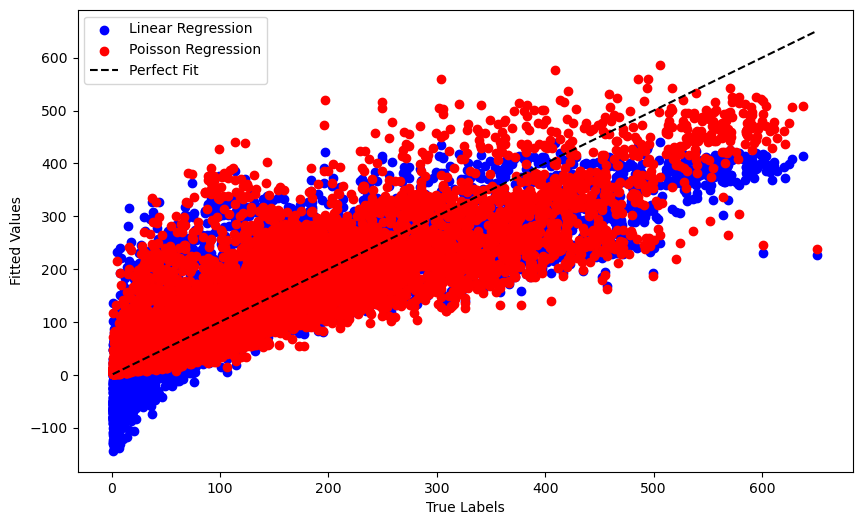

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

plt.scatter(Y.values, M_lm.fittedvalues.values, color='blue', label='Linear Regression')
plt.scatter(Y.values, M_pois.fittedvalues.values, color='red', label='Poisson Regression')

plt.plot([min(Y.values), max(Y.values)], [min(Y.values), max(Y.values)], 
         color='black', linestyle='--', label='Perfect Fit')

plt.xlabel('True Labels')
plt.ylabel('Fitted Values')
plt.legend();